In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [2]:
train_dir = './clean-dataset/train'
validation_dir = './clean-dataset/validation'
image_size = 224

## Experiment 1: Freezing all layers - Same as Transfer Learning
Create the model

In [3]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

58892288/58889256 [==============================] - 258s 4us/step
<keras.engine.input_layer.InputLayer object at 0x000001A7CE20E2C8> False
<keras.layers.convolutional.Conv2D object at 0x000001A7ED8DE208> False
<keras.layers.convolutional.Conv2D object at 0x000001A7ED8F61C8> False
<keras.layers.pooling.MaxPooling2D object at 0x000001A7ED91A748> False
<keras.layers.convolutional.Conv2D object at 0x000001A7ED91A148> False
<keras.layers.convolutional.Conv2D object at 0x000001A7ED929A88> False
<keras.layers.pooling.MaxPooling2D object at 0x000001A7ED92C908> False
<keras.layers.convolutional.Conv2D object at 0x000001A7ED930CC8> False
<keras.layers.convolutional.Conv2D object at 0x000001A7ED935E48> False
<keras.layers.convolutional.Conv2D object at 0x000001A7ED937AC8> False
<keras.layers.pooling.MaxPooling2D object at 0x000001A7ED93E788> False
<keras.layers.convolutional.Conv2D object at 0x000001A7ED93EFC8> False
<keras.layers.convolutional.Conv2D object at 0x000001A7EDA45A88> False
<keras.l

## Experiment 1
Train the model

In [4]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [5]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/5
6/6 [==============================] - 57s 10s/step - loss: 10.5500 - accuracy: 0.3883 - val_loss: 4.6774e-05 - val_accuracy: 0.5200
Epoch 2/5
6/6 [==============================] - 60s 10s/step - loss: 2.0654 - accuracy: 0.5900 - val_loss: 0.8519 - val_accuracy: 0.7667
Epoch 3/5
6/6 [==============================] - 59s 10s/step - loss: 0.7458 - accuracy: 0.7833 - val_loss: 0.0305 - val_accuracy: 0.8400
Epoch 4/5
6/6 [==============================] - 59s 10s/step - loss: 0.3631 - accuracy: 0.8750 - val_loss: 0.0905 - val_accuracy: 0.9067
Epoch 5/5
6/6 [==============================] - 60s 10s/step - loss: 0.1807 - accuracy: 0.9333 - val_loss: 0.0211 - val_accuracy: 0.8133


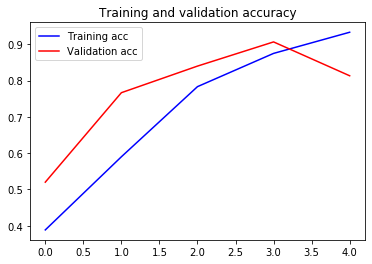

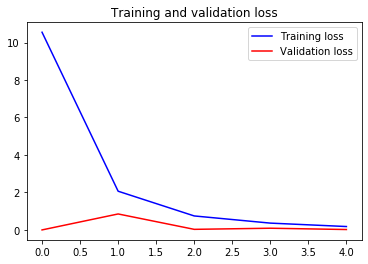

In [6]:
# Save the Model
model.save('all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()